# Weatherpy Analysis

##### Observable Trends:
###### 1. As you go closer to the equator, it gets hotter. Highest temperatures range between -20 and +20 degrees lattitude. On the other hand, there is a dramatic decrease in max temperature as you reach higher latitudes.
###### 2. Cities close to the equator have high humidity, generally no less than 70% humidity. Most cities at -10 degrees latitude have humidity ranging from 80 to 100%.
###### 3. In general, cities near the equator have lower wind speeds than those not near the equator. Most aggregrate at wind speeds up to 10 mph.

In [1]:
# Dependencies
import random
import json
from pprint import pprint
import requests
from citipy import citipy
from config import api_key
import pandas as pd
import matplotlib.pyplot as plt

# Generate Cities From Coordinates

In [2]:
# Function to generate 1000 random coordinates
def randCoord():
    for x in range(1000):
        coordinates.append((random.randint(-90, 91), random.randint(-180, 181)))

# randCoord()
# print(coordinates)

In [3]:
# Function to find unique cities based on generated coordinates
def findCity():
    for coordinate_pair in coordinates:
        lat, lon = coordinate_pair
        city_obj = citipy.nearest_city(lat, lon)
        city = city_obj.city_name
        
        # Want unique cities only
        if city not in cities:
            cities.append(city)

# findCity()
# print(cities)
# print(f"Unique cities found based on lat/lon out of {coordinate_count} coordinate pairs: {len(cities)}")

# Perform API Calls

In [4]:
# Ask how many cities to analyze
how_many_cities = input("How many cities do you want to analyze? ")

How many cities do you want to analyze? 750


In [5]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [6]:
# Hold generated coordinates and unique cities
coordinates = []
cities = []

# Set up lists to hold reponse information
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

# Make counters
counter = 0
randCoord_count = 0

while len(name) < int(how_many_cities):
    
    # Generate coordinate pairs
    randCoord()
    
    # Count how many times randCoord ran
    randCoord_count += 1
    
    # Look up unique nearby cities
    findCity()
    
    # Loop through the list of cities and perform a request for data on each
    # *Need to start for loop at where it ended
    for city in cities[counter:]:
        
        # Increment counter
        counter += 1
        print(f"Processing Record {counter} | {city}")
        
        # Replace spaces in cities names of more than one word
        city_name = city.replace(" ", "+")
        
        # Print each query
        full_query_url = query_url + city_name
        print(full_query_url)
        
        # Retrieve data as json
        response = requests.get(full_query_url).json()
        
        # Append data to lists
        try:
            citi = response['name']
            if len(name) == int(how_many_cities):
                break            
            elif citi not in name:
                name.append(response['name'])
                cloudiness.append(response['clouds']['all'])
                country.append(response['sys']['country'])
                date.append(response['dt'])
                humidity.append(response['main']['humidity'])
                lat.append(response['coord']['lat'])
                lon.append(response['coord']['lon'])
                max_temp.append(response['main']['temp_max'])
                wind_speed.append(response['wind']['speed'])
        except KeyError:
            print(f"*City Not Found ({city})")
        except:
            pass
            # raise

Processing Record 1 | shaoguan
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=shaoguan
Processing Record 2 | bouna
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=bouna
Processing Record 3 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=waipawa
Processing Record 4 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=esperance
Processing Record 5 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mahebourg
Processing Record 6 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=port+alfred
Processing Record 7 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=bluff
Pro

Processing Record 58 | cape town
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=cape+town
Processing Record 59 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=raudeberg
Processing Record 60 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hobart
Processing Record 61 | roald
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=roald
Processing Record 62 | henderson
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=henderson
Processing Record 63 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tasiilaq
Processing Record 64 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=narsaq


*City Not Found (marcona)
Processing Record 114 | stranraer
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=stranraer
Processing Record 115 | sentyabrskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sentyabrskiy
*City Not Found (sentyabrskiy)
Processing Record 116 | dutlwe
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=dutlwe
Processing Record 117 | rocha
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=rocha
Processing Record 118 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kruisfontein
Processing Record 119 | geraldton
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=geraldton
Processing Record 120 | new norfolk
http://api.openweathermap.o

Processing Record 169 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=torbay
Processing Record 170 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=beringovskiy
Processing Record 171 | faya
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=faya
Processing Record 172 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kaitangata
Processing Record 173 | duz
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=duz
*City Not Found (duz)
Processing Record 174 | hansi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hansi
Processing Record 175 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&uni

Processing Record 224 | beloha
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=beloha
Processing Record 225 | kumba
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kumba
Processing Record 226 | jaque
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=jaque
*City Not Found (jaque)
Processing Record 227 | dalby
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=dalby
Processing Record 228 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=meulaboh
Processing Record 229 | college
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=college
Processing Record 230 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperia

Processing Record 279 | maceio
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=maceio
Processing Record 280 | sur
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sur
Processing Record 281 | cockburn harbour
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=cockburn+harbour
*City Not Found (cockburn harbour)
Processing Record 282 | nizwa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=nizwa
Processing Record 283 | oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=oktyabrskoye
Processing Record 284 | muros
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=muros
Processing Record 285 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e12

Processing Record 334 | mokhsogollokh
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mokhsogollokh
Processing Record 335 | kaka
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kaka
Processing Record 336 | kurara
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kurara
Processing Record 337 | ayan
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ayan
Processing Record 338 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=longyearbyen
Processing Record 339 | balingasay
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=balingasay
Processing Record 340 | turukhansk
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=i

Processing Record 392 | caraballeda
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=caraballeda
Processing Record 393 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=coquimbo
Processing Record 394 | ugoofaaru
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ugoofaaru
Processing Record 395 | thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=thinadhoo
Processing Record 396 | kisesa
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kisesa
Processing Record 397 | mujiayingzi
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mujiayingzi
Processing Record 398 | plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c8

Processing Record 447 | armidale
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=armidale
Processing Record 448 | vanavara
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=vanavara
Processing Record 449 | warqla
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=warqla
*City Not Found (warqla)
Processing Record 450 | ambon
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=ambon
Processing Record 451 | necochea
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=necochea
Processing Record 452 | acayucan
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=acayucan
Processing Record 453 | galesong
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5f

*City Not Found (samusu)
Processing Record 504 | gat
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=gat
Processing Record 505 | potsdam
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=potsdam
Processing Record 506 | nkhotakota
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=nkhotakota
Processing Record 507 | kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kavaratti
Processing Record 508 | dongkan
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=dongkan
Processing Record 509 | chifeng
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=chifeng
Processing Record 510 | anjad
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95

Processing Record 560 | lingao
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=lingao
Processing Record 561 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=aklavik
Processing Record 562 | rungata
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=rungata
*City Not Found (rungata)
Processing Record 563 | tra vinh
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tra+vinh
Processing Record 564 | harqalah
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=harqalah
Processing Record 565 | beyneu
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=beyneu
Processing Record 566 | agadez
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95

Processing Record 615 | kholm
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=kholm
Processing Record 616 | boueni
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=boueni
Processing Record 617 | tagusao
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tagusao
Processing Record 618 | barranca
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=barranca
Processing Record 619 | tianpeng
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tianpeng
Processing Record 620 | mayumba
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=mayumba
Processing Record 621 | artyk
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=artyk
*City

Processing Record 670 | sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sinnamary
Processing Record 671 | inirida
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=inirida
Processing Record 672 | sinjar
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=sinjar
Processing Record 673 | anahuac
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=anahuac
Processing Record 674 | haines junction
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=haines+junction
Processing Record 675 | blackwater
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=blackwater
Processing Record 676 | kousseri
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95

Processing Record 725 | paita
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=paita
Processing Record 726 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=tazovskiy
Processing Record 727 | marystown
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=marystown
Processing Record 728 | helsinki
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=helsinki
Processing Record 729 | otaru
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=otaru
Processing Record 730 | vestmanna
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=vestmanna
Processing Record 731 | limulunga
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q

Processing Record 781 | hirara
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=hirara
Processing Record 782 | yar-sale
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=yar-sale
Processing Record 783 | pemberton
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=pemberton
Processing Record 784 | santa ines
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=santa+ines
Processing Record 785 | brae
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=brae
Processing Record 786 | bahia honda
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperial&q=bahia+honda
Processing Record 787 | tiznit
http://api.openweathermap.org/data/2.5/weather?appid=b9d7939379e121fce5e79c1c83d5fb95&units=imperia

In [7]:
# print(name)
print(f"Unique cities found after {randCoord_count} random coordinate generation(s): {len(cities)}")
print(f"Number of cities successfully queried out of {counter - 1}: {len(name)}")

Unique cities found after 3 random coordinate generation(s): 951
Number of cities successfully queried out of 835: 750


In [42]:
# Create df
cities_data_df = pd.DataFrame({'City': name, 
                               'Cloudiness': cloudiness, 
                               'Country': country, 
                               'Date': date, 
                               'Humidity': humidity, 
                               'Lat': lat, 
                               'Lon': lon, 
                               'Max Temp': max_temp, 
                               'Wind Speed': wind_speed})

# Format unix timestamp to datetime
cities_data_df['Date'] = pd.to_datetime(cities_data_df['Date'], unit='s')

# Save to csv and show
cities_data_df.to_csv('cities_data/cities_data.csv', encoding='utf-8', index=False)
cities_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Shaoguan,44,CN,2018-03-08 05:20:38,78,24.81,113.59,53.87,7.81
1,Bouna,24,CI,2018-03-08 05:20:38,85,9.27,-3.00,73.85,9.15
2,Waipawa,92,NZ,2018-03-08 05:20:39,97,-39.94,176.59,61.25,11.05
3,Esperance,20,TT,2018-03-08 04:00:00,83,10.24,-61.45,77.00,6.93
4,Mahebourg,75,MU,2018-03-08 05:00:00,83,-20.41,57.70,80.60,8.05
5,Port Alfred,92,ZA,2018-03-08 05:20:40,100,-33.59,26.89,68.86,14.29
6,Bluff,88,AU,2018-03-08 04:54:54,43,-23.58,149.07,86.18,17.72
7,Laguna,0,MX,2018-03-08 05:20:41,66,27.52,-110.01,57.29,2.33
8,Warrington,90,GB,2018-03-08 04:50:00,93,53.39,-2.59,37.40,5.82
9,Rikitea,32,PF,2018-03-08 04:55:06,100,-23.12,-134.97,79.07,13.85


# Latitude vs. Temperature Plot

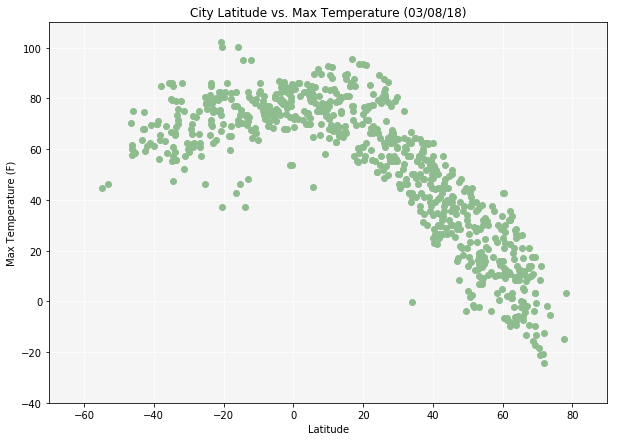

In [77]:
# Set figure size
plt.figure(figsize=(10, 7))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Max Temp'], marker='o', color='darkseagreen')

# Set limits
plt.xlim(-70, 90)
plt.ylim(-40, 110)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Label title and axes
plt.title('City Latitude vs. Max Temperature (03/08/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Latitude vs. Temperature Plot
plt.savefig('images/LatVsTemp.png')
plt.show()

# Latitude vs. Humidity Plot

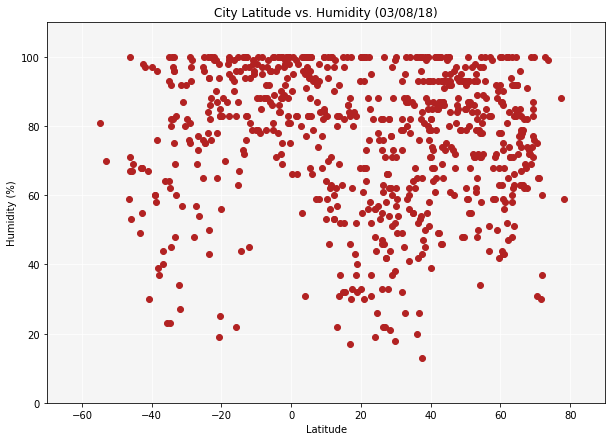

In [78]:
# Set figure size
plt.figure(figsize=(10, 7))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Humidity'], marker='o', color='firebrick')

# Set limits
plt.xlim(-70, 90)
plt.ylim(0, 110)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Label title and axes
plt.title('City Latitude vs. Humidity (03/08/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Latitude vs. Humidity Plot
plt.savefig('images/LatVsHumidity.png')
plt.show()

# Latitude vs. Cloudiness Plot

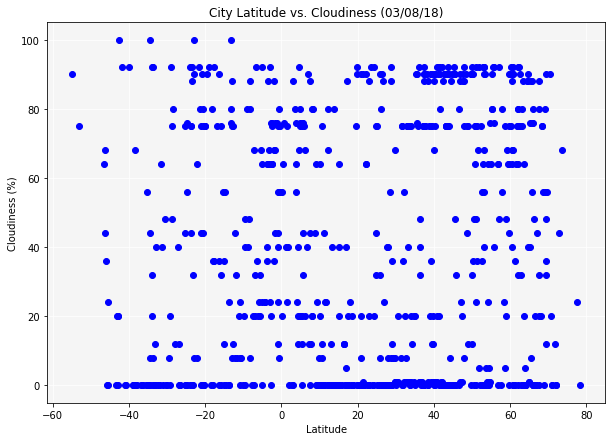

In [79]:
# Set figure size
plt.figure(figsize=(10, 7))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Cloudiness'], marker='o', color='b')

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Label title and axes
plt.title('City Latitude vs. Cloudiness (03/08/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Latitude vs. Cloudiness Plot
plt.savefig('images/LatVsCloudiness.png')
plt.show()

# Latitude vs. Wind Speed Plot

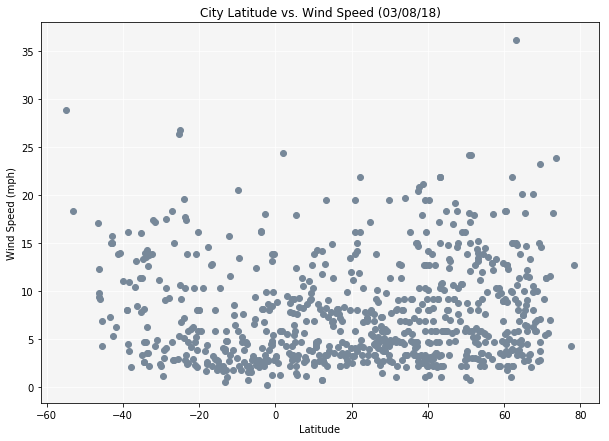

In [80]:
# Set figure size
plt.figure(figsize=(10, 7))

# Create scatter plot
plt.scatter(cities_data_df['Lat'], cities_data_df['Wind Speed'], marker='o', color='lightslategrey')

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Insert grid lines and set behind plot elements
ax.grid(color='white')
ax.set_axisbelow(True)

# Label title and axes
plt.title('City Latitude vs. Wind Speed (03/08/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Latitude vs. Wind Speed Plot
plt.savefig('images/LatVsWindSpd.png')
plt.show()

# World Map

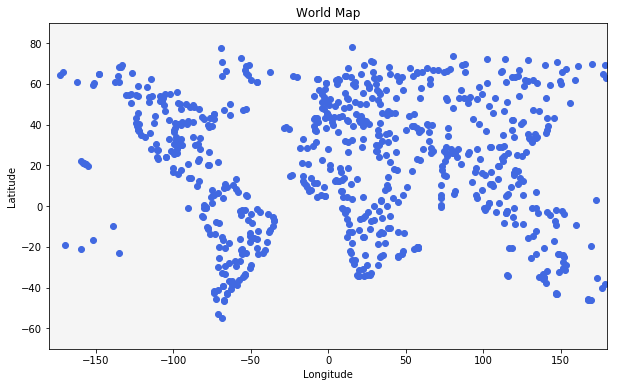

In [81]:
# Set figure size
plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(cities_data_df['Lon'], cities_data_df['Lat'], marker='o', color='royalblue')

# Set limits
plt.xlim(-180, 180)
plt.ylim(-70, 90)

# Set axes background color
ax = plt.gca()
ax.set_facecolor('whitesmoke')

# Label title and axes
plt.title('World Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Latitude vs. Longitude Plot
plt.savefig('images/WorldMap.png')
plt.show()